# Load

## libs

In [163]:
datadir <- '/n/data1/bwh/medicine/korsunsky/lab/'

In [164]:
suppressWarnings({
    source('../ImageAnalyses/utils_celldive.R')    
})


In [165]:
source('../Figures/colors.R') 


## Colors

In [166]:
## Shared heatmap font sizes
ht_opt(RESET = TRUE)
ht_opt("heatmap_column_names_gp" = gpar(fontsize = 8))
ht_opt("heatmap_row_names_gp" = gpar(fontsize = 8))
ht_opt('legend_title_gp' = gpar(fontsize = 8))
ht_opt('legend_labels_gp' = gpar(fontsize = 8))


## data

In [167]:
lip <- list()
lip$spots <- readRDS(glue('{datadir}/lip1_spots.rds'))
lip$cells <- readRDS(glue('{datadir}/lip1_cells.rds'))
lip$fibroblasts <- readRDS(glue('{datadir}/lip1_fibroblasts.rds'))
lip$stats <- readRDS(glue('{datadir}/lip1_res_coloc.rds'))


gut <- list()
gut$spots <- readRDS(glue('{datadir}/gut_spots.rds'))
gut$cells <- readRDS(glue('{datadir}/gut_cells.rds'))
gut$fibroblasts <- readRDS(glue('{datadir}/gut_fibroblasts.rds'))
gut$stats <- readRDS(glue('{datadir}/gut_res_coloc.rds'))


synovium <- list()
synovium$spots <- readRDS(glue('{datadir}/synovium_spots.rds'))
synovium$cells <- readRDS(glue('{datadir}/synovium_cells.rds'))
synovium$fibroblasts <- readRDS(glue('{datadir}/synovium_fibroblasts.rds'))
synovium$stats <- readRDS(glue('{datadir}/synovium_res_coloc.rds'))


In [168]:
objs <- list(Gut = gut, Lip = lip, Synovium = synovium)

## Change LibraryIDs to anonymous IDs

In [169]:
dict_donors <- c('GI6645'='Gut1', 'GI6717'='Gut2', 'GI6846'='Gut3', 'JPR118'='Synovium1', 'JPR125'='Synovium2', 'SG250'='Lip1', 'S445250'='Lip1')


# raw images

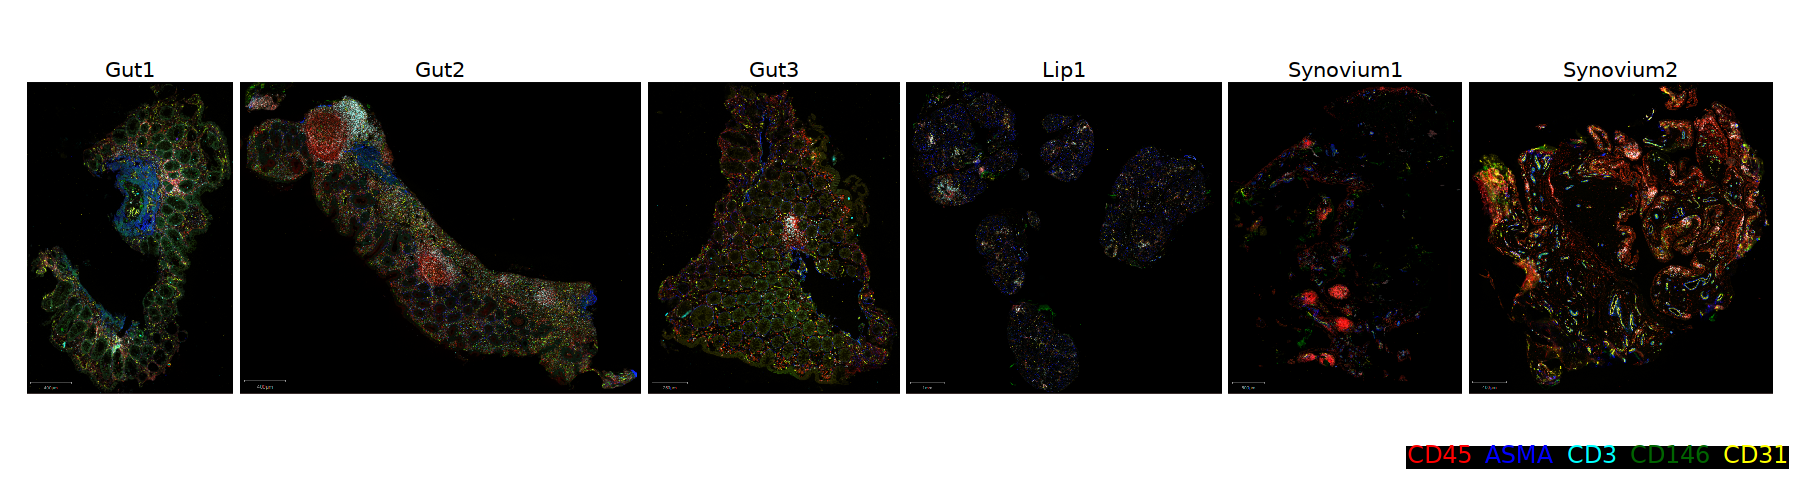

In [170]:
library(magick)

library(ggtext)

imgs <- map2(
    c('GI6645.png', 'GI6717.png', 'GI6846.png', 'S445250.png', 'JPR118.png', 'JPR125.png'), 
    c('Gut', 'Gut', 'Gut', 'Lip', 'Synovium', 'Synovium'), 
    function(fname, .tissue) {
    # img <- readPNG(file.path(datadir, fname), native = TRUE)
    # img <- wrap_elements(panel = img)
    libname <- dict_donors[gsub('.png', '', fname)]
    img <- image_read(file.path(datadir, fname)) %>% 
        image_border('white', '10x0') %>% 
        image_ggplot() + 
            labs(title = libname) + 
            theme(plot.title = element_text(hjust = .5, size = 12))
    return(img)
})

p0 <- wrap_elements(Reduce('|', imgs))

## Add caption 
p0 <- p0 + labs(
        caption = "<span style='color:red'>CD45</span> 
                   <span style='color:blue'>ASMA</span>
                   <span style='color:cyan'>CD3</span>
                   <span style='color:darkgreen'>CD146</span>
                   <span style='color:yellow'>CD31</span>
    ") + 
    theme(plot.caption = element_markdown(fill = 'black', size = 14)) + 
    NULL

fig.size(4, 15)
p0

# ROI pngs

## vascular

In [171]:
fnames <- list.files('../../data/CellDive/ROIs_Mathilde/', full=TRUE, pattern='SPARC.*.tif')
libnames <- map(str_split(gsub('.*/(.*)', '\\1', fnames), ' '), 1)

In [172]:
p_ro1_vasc <- map2(fnames, libnames, function(fname, libname) {
    libname <- dict_donors[libname]
    img <- magick::image_read(fname) %>% 
        magick::image_border('white', '10x0')  %>% 
        magick::image_ggplot() + 
        labs(title = glue('{libname}\nPerivascular ROI')) + 
        theme(plot.title = element_text(hjust = .5, size = 10)) + 
        NULL
    return(img)
})
names(p_ro1_vasc) <- libnames
p_ro1_vasc <- p_ro1_vasc[c('GI6645', 'GI6717', 'GI6846', 'SG250', 'JPR118', 'JPR125')]
p_ro1_vasc <- p_ro1_vasc %>% reduce(`|`)


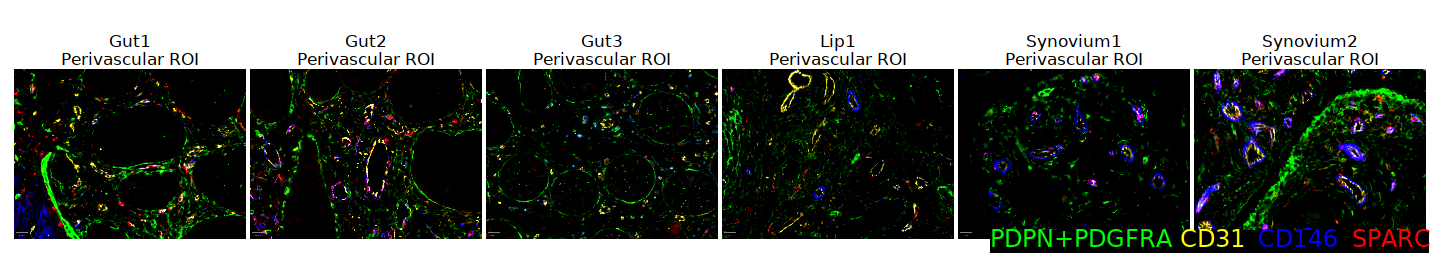

In [173]:
## Add caption 
p_ro1_vasc <- wrap_elements(full = p_ro1_vasc) + labs(
        caption = "<span style='color:green'>PDPN+PDGFRA</span> 
                   <span style='color:yellow'>CD31</span>
                   <span style='color:blue'>CD146</span>
                   <span style='color:red'>SPARC</span>
    ") + 
    theme(plot.caption = element_markdown(fill = 'black', size = 14)) + 
    NULL

fig.size(2.2, 12)
p_ro1_vasc

## lymphoid

In [174]:
fnames <- list.files('../../data/CellDive/ROIs_Mathilde/', full=TRUE, pattern='CCL19.*tif')
libnames <- map(str_split(gsub('.*/(.*)', '\\1', fnames), ' '), 1)

In [175]:
p_ro1_lymph <- map2(fnames, libnames, function(fname, libname) {
    libname <- dict_donors[libname]
    img <- magick::image_read(fname) %>% 
        magick::image_border('white', '10x0')  %>% 
        magick::image_ggplot() + 
        labs(title = glue('{libname}\nPerivascular ROI')) + 
        theme(plot.title = element_text(hjust = .5, size = 10)) + 
        NULL
    return(img)
})
names(p_ro1_lymph) <- libnames
p_ro1_lymph <- p_ro1_lymph[c('GI6645', 'GI6717', 'GI6846', 'SG250', 'JPR118', 'JPR125')]
p_ro1_lymph <- p_ro1_lymph %>% reduce(`|`)


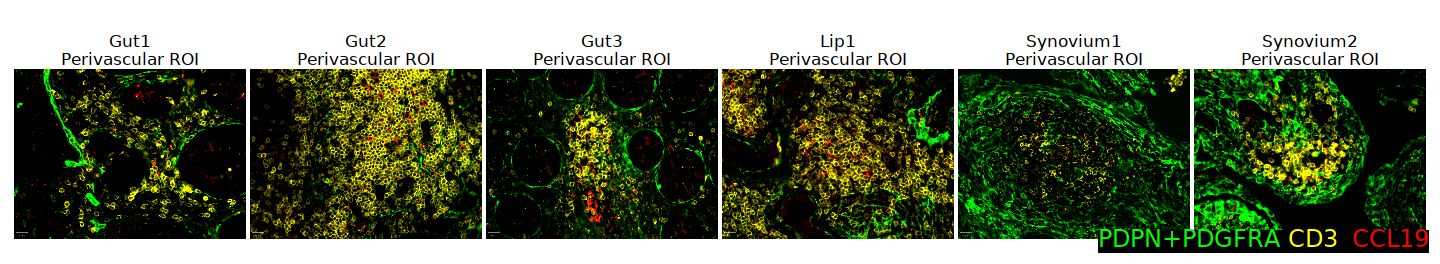

In [176]:
## Add caption 
p_ro1_lymph <- wrap_elements(full = p_ro1_lymph) + labs(
        caption = "<span style='color:green'>PDPN+PDGFRA</span> 
                   <span style='color:yellow'>CD3</span>
                   <span style='color:red'>CCL19</span>
    ") + 
    theme(plot.caption = element_markdown(fill = 'black', size = 14)) + 
    NULL

fig.size(2.2, 12)
p_ro1_lymph

# Data summary 

In [177]:
objs %>% map('cells') %>% map('metadata') %>% map_int(nrow) %>% reduce(sum)

[1] 355227

In [178]:
objs %>% map(function(obj) {
    data.frame(table(obj$cells$metadata$LibraryID)) 
}) 

$Gut
    Var1  Freq
1 GI6645 24806
2 GI6717 58717
3 GI6846 17616

$Lip
     Var1   Freq
1 S445250 195617

$Synovium
    Var1  Freq
1 JPR118 19048
2 JPR125 39423

In [179]:
# p0 <- objs %>% map(function(obj) {
#     data.frame(table(obj$cells$metadata$LibraryID)) 
# }) %>% 
#     bind_rows(.id = 'Tissue') %>% 
#     ggplot(aes(reorder(Var1, Freq), Freq, fill = Tissue)) + 
#         geom_bar(stat = 'identity') + 
#         coord_flip() + 
#         scale_y_log10() + 
#         # facet_grid(Tissue~., scales='free', space='free') + 
#         labs(x = 'LibraryID', y = 'Number of Segmented Cells') + 
#         NULL
# fig.size(4, 8)
# p0


# Niches (space)

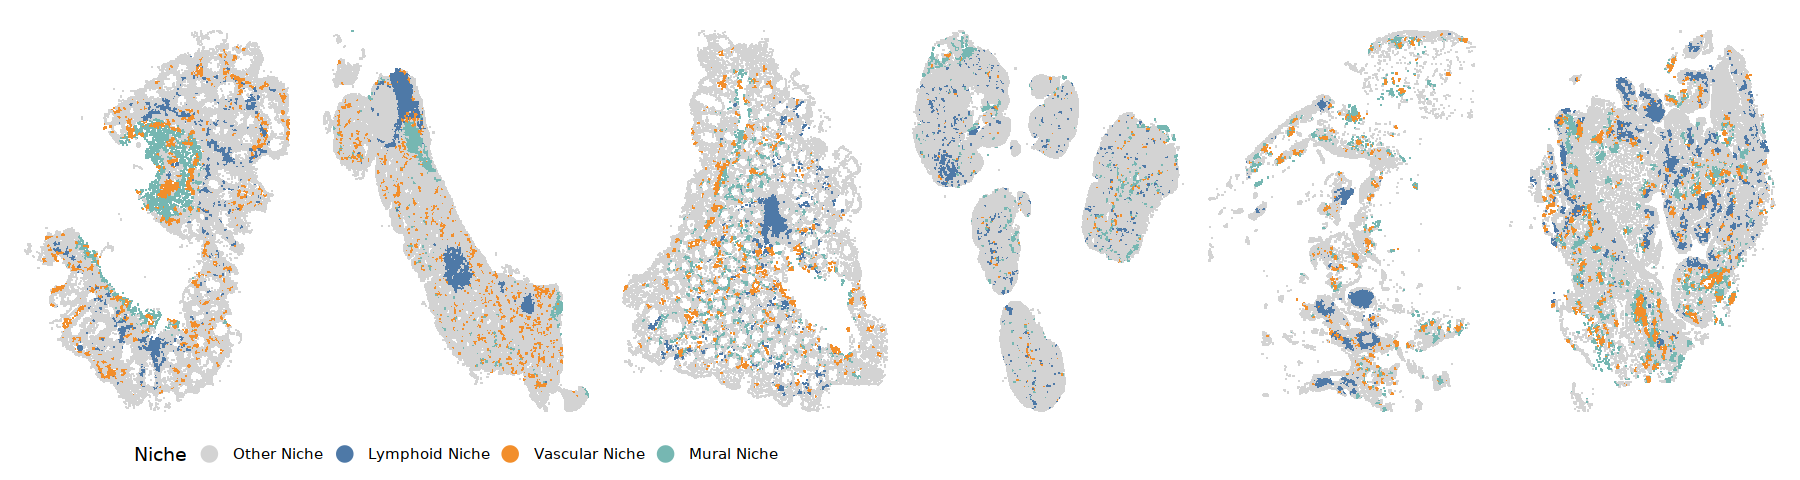

In [180]:
p1 <- objs %>% map('spots') %>% imap(function(.SD, .tissue) {
    with(.SD, {
        metadata <- metadata %>% 
            dplyr::mutate(Niche_nice = case_when(
                Niche_nice == 'Vascular_ASMA' ~ 'Mural',
                TRUE ~ Niche_nice
            )) %>% 
            dplyr::mutate(Niche_nice = paste0(Niche_nice, ' Niche'))
        
        do_scatter(
            data.frame(x = metadata$y, y = -metadata$x), metadata, 'Niche_nice',
            do_labels = FALSE, no_guides = .tissue != 'Gut', 
            palette_use = palette_global[unique(metadata$Niche_nice)], empty_theme=TRUE
        ) + 
            facet_wrap(~glue('{LibraryID} ({.tissue})'), scales='free') + 
            theme(
                legend.position = 'bottom',
                legend.margin = margin(c(0, 0, 0, 0)), 
                strip.text = element_blank()
            ) + 
            labs(color = 'Niche', fill = 'Niche') + 
            NULL
    })
}) %>% 
    purrr::reduce(`+`) + 
    plot_layout(widths = c(3, 1, 2))


p1 <- wrap_elements(full = p1)

fig.size(4, 15)
p1


# Co-loc stats

In [181]:
.x <- objs %>% map('stats') %>% bind_rows(.id = 'Tissue') %>%
    dplyr::mutate(beta = log2(exp(beta)))
# .x %>% subset
data.table(.x)[, .(mu = mean(beta), sig = sd(beta)), by = .(Subtype, Niche_nice)] %>% 
    dplyr::mutate(pval = exp(pnorm(-mu/sig, log.p = TRUE, lower.tail = TRUE))) %>% 
    arrange(pval)


X <- objs %>% map('stats') %>% bind_rows(.id = 'Tissue') %>% 
    dplyr::mutate(SCORE = log2(exp(beta))) %>% 
    dplyr::mutate(Subtype = case_when(
        Subtype == 'Immuno' ~ 'CCL19+',
        Subtype == 'Vascular' ~ 'SPARC+',
        TRUE ~ 'Other'
    )) %>% 
    dplyr::select(Tissue, LibraryID, Subtype, Niche_nice, SCORE) %>% 
    dplyr::mutate(Niche_nice = case_when(
        Niche_nice == 'Vascular_ASMA' ~ 'Mural',
        TRUE ~ Niche_nice
    )) %>% 
    dplyr::mutate(Niche_nice = paste0(Niche_nice, ' Niche')) %>% 
    tidyr::spread(Niche_nice, SCORE) 

X_mat <- as.matrix(dplyr::select(X, `Lymphoid Niche`:`Vascular Niche`))
rownames(X_mat) <- X$Subtype
# colnames(X_mat) <- paste0(colnames(X_mat), ' Niche')
# colnames(X_mat) <- paste0(colnames(X_mat), '\n Niche')
# rownames(X_mat) <- as.character(apply(dplyr::select(X, Tissue, LibraryID, Subtype), 1, paste, collapse = '_', simplify = FALSE))

Subtype    Niche_nice    mu          sig       pval        
1  Immuno     Lymphoid       3.88726582 0.7769628 2.819964e-07
2  Fibroblast Other          1.05328837 0.2794572 8.193494e-05
3  Vascular   Vascular_ASMA  2.19033755 0.6071799 1.546436e-04
4  Vascular   Vascular       1.26661259 0.9539026 9.211851e-02
5  Fibroblast Vascular       0.20794651 0.2648305 2.161664e-01
6  Immuno     Other          0.24376767 0.7554299 3.734660e-01
7  Vascular   Other         -0.07858109 0.3123017 5.993323e-01
8  Fibroblast Vascular_ASMA -0.49269045 0.8659689 7.153040e-01
9  Fibroblast Lymphoid      -0.77782426 1.0224445 7.765967e-01
10 Immuno     Vascular      -0.48167396 0.5343267 8.163280e-01
11 Immuno     Vascular_ASMA -3.25061822 1.4108737 9.893880e-01
12 Vascular   Lymphoid      -3.29080767 1.3548448 9.924280e-01

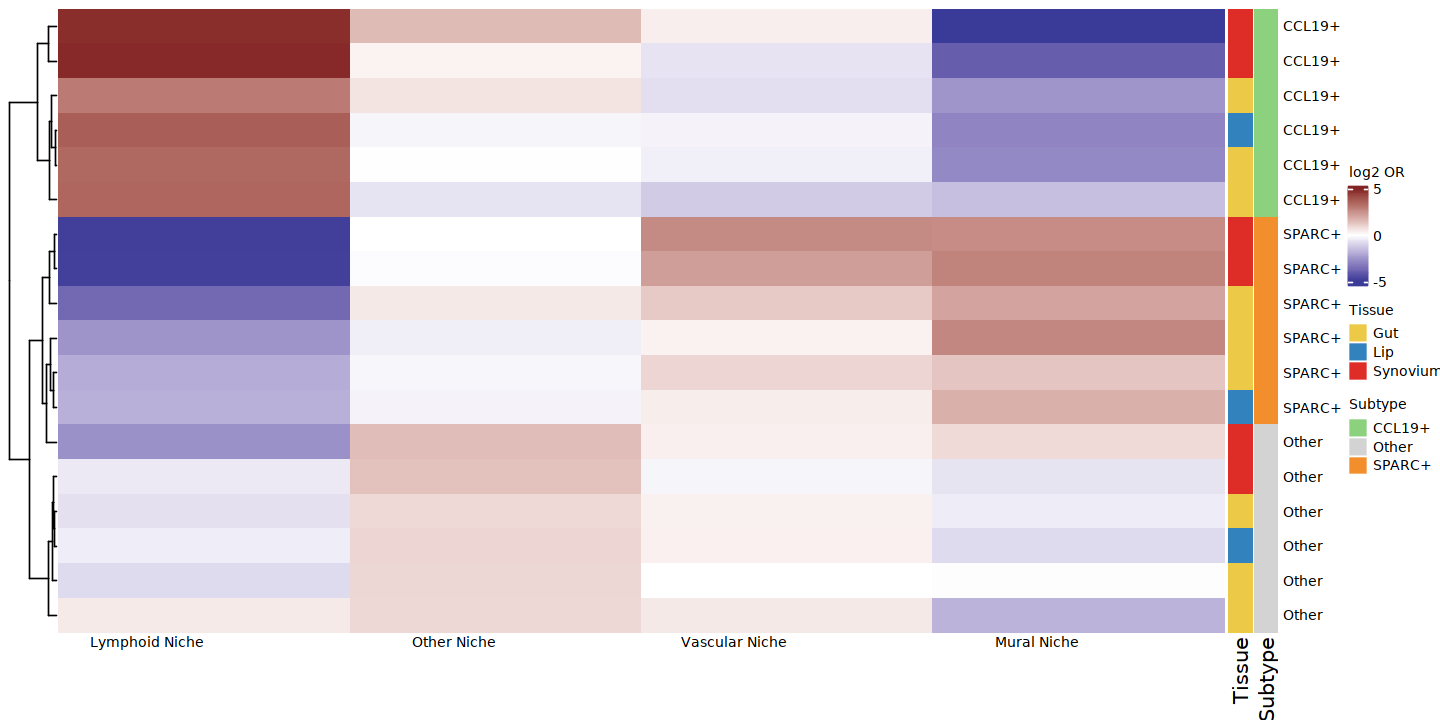

In [182]:
fig.size(6, 12)
set.seed(1)
p4 <- Heatmap(
    matrix = X_mat,
    right_annotation = rowAnnotation(
        df = dplyr::select(X, Tissue, Subtype),
        col = palette_heatmap
    ),
    colorRamp2(c(-5, 0, 5), c(muted('blue'), 'white', muted('red'))), 
    name = 'log2 OR',
    column_names_rot = 0, 
    show_column_dend = FALSE
)
p4 <- grid.grabExpr(draw(p4)) #bottom, left, top, right paddings
# p4 <- grid.grabExpr(draw(p4, padding = unit(c(10, 2, 2, 2), "mm"), heatmap_legend_side = 'bottom')) #bottom, left, top, right paddings
    

p4 <- wrap_elements(full = p4)
fig.size(6, 12)
p4

# Co-loc images

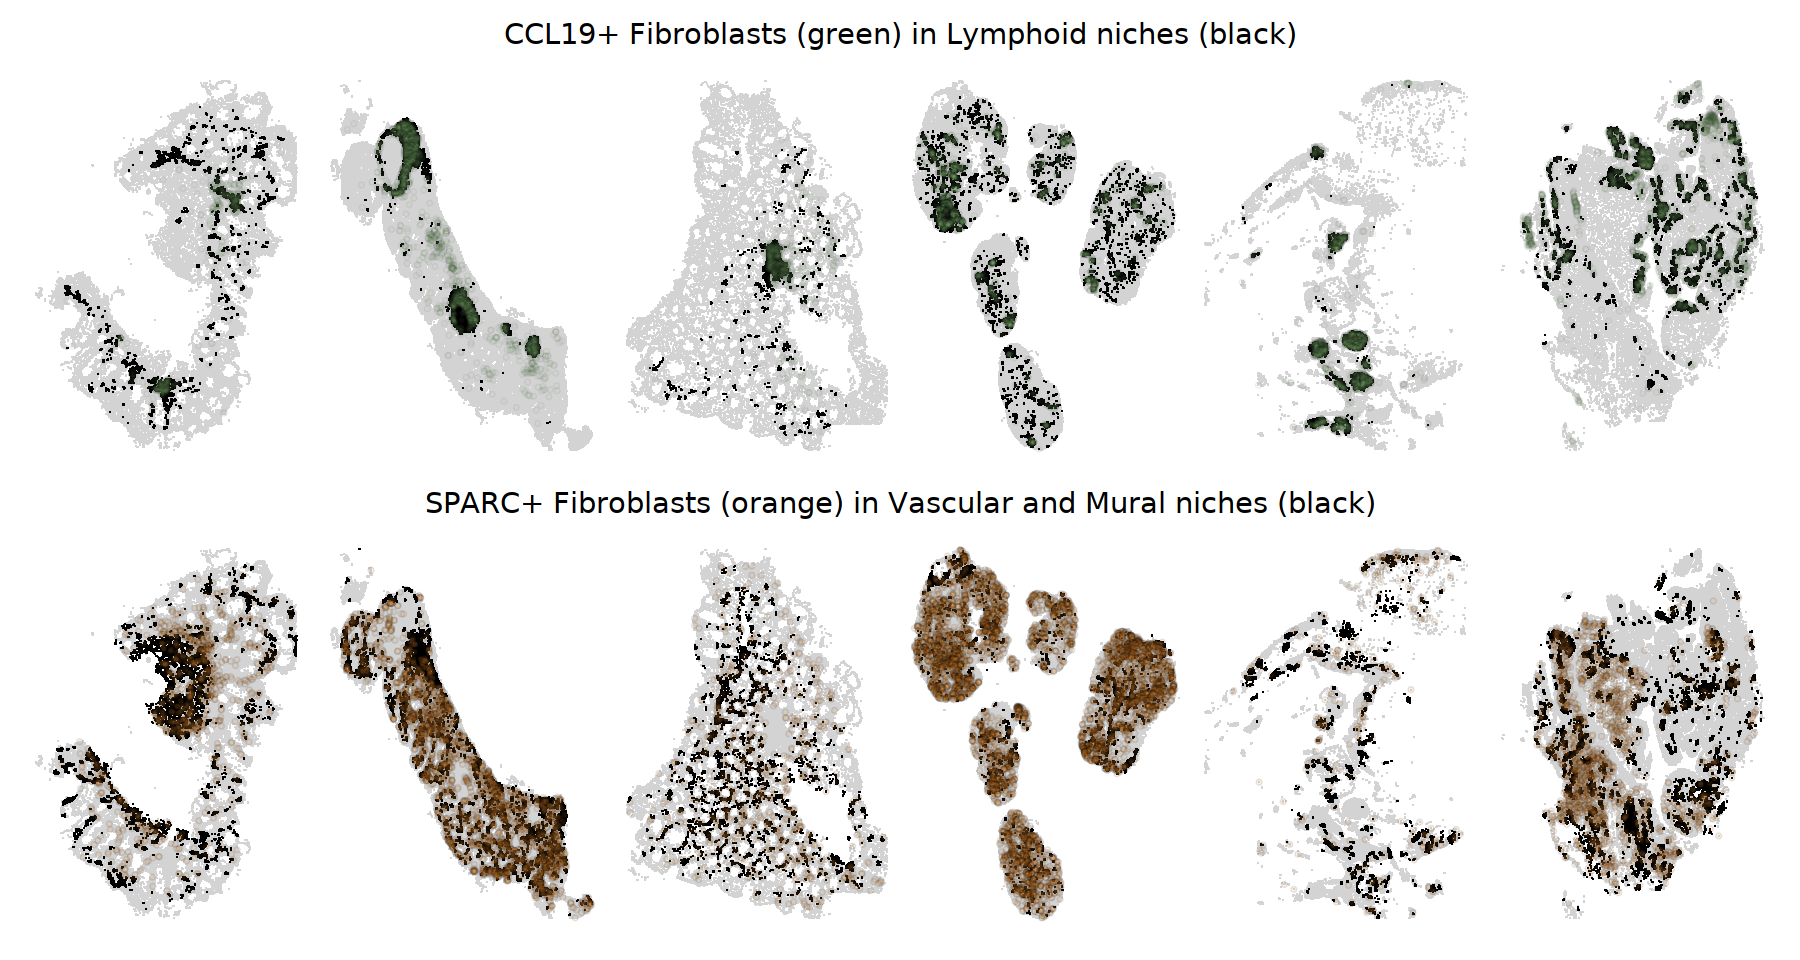

In [183]:
p5 <- objs %>% 
    map(function(obj) {
        nice_plot_coloc(obj$spots, obj$fibroblasts, 'Lymphoid', 'Immuno', '#8CD17D', alpha=.05, show_libname=FALSE)
    }) %>% 
    reduce(`|`) + 
    plot_layout(widths = c(3, 1, 2)) + 
    plot_annotation(title = 'CCL19+ Fibroblasts (green) in Lymphoid niches (black)', theme = theme(plot.title = element_text(hjust = 0.5)))
p5 <- wrap_elements(full = p5)


p6 <- objs %>% 
    map(function(obj) {
        nice_plot_coloc(obj$spots, obj$fibroblasts, c('Vascular', 'Vascular_ASMA'), 'Vascular', '#F28E2B', alpha=.1, show_libname=FALSE)
    }) %>% 
    reduce(`|`) + 
    plot_layout(widths = c(3, 1, 2)) + 
    plot_annotation(title = 'SPARC+ Fibroblasts (orange) in Vascular and Mural niches (black)', theme = theme(plot.title = element_text(hjust = 0.5)))
p6 <- wrap_elements(full = p6)

fig.size(8, 15)
p5 / p6


# Full 

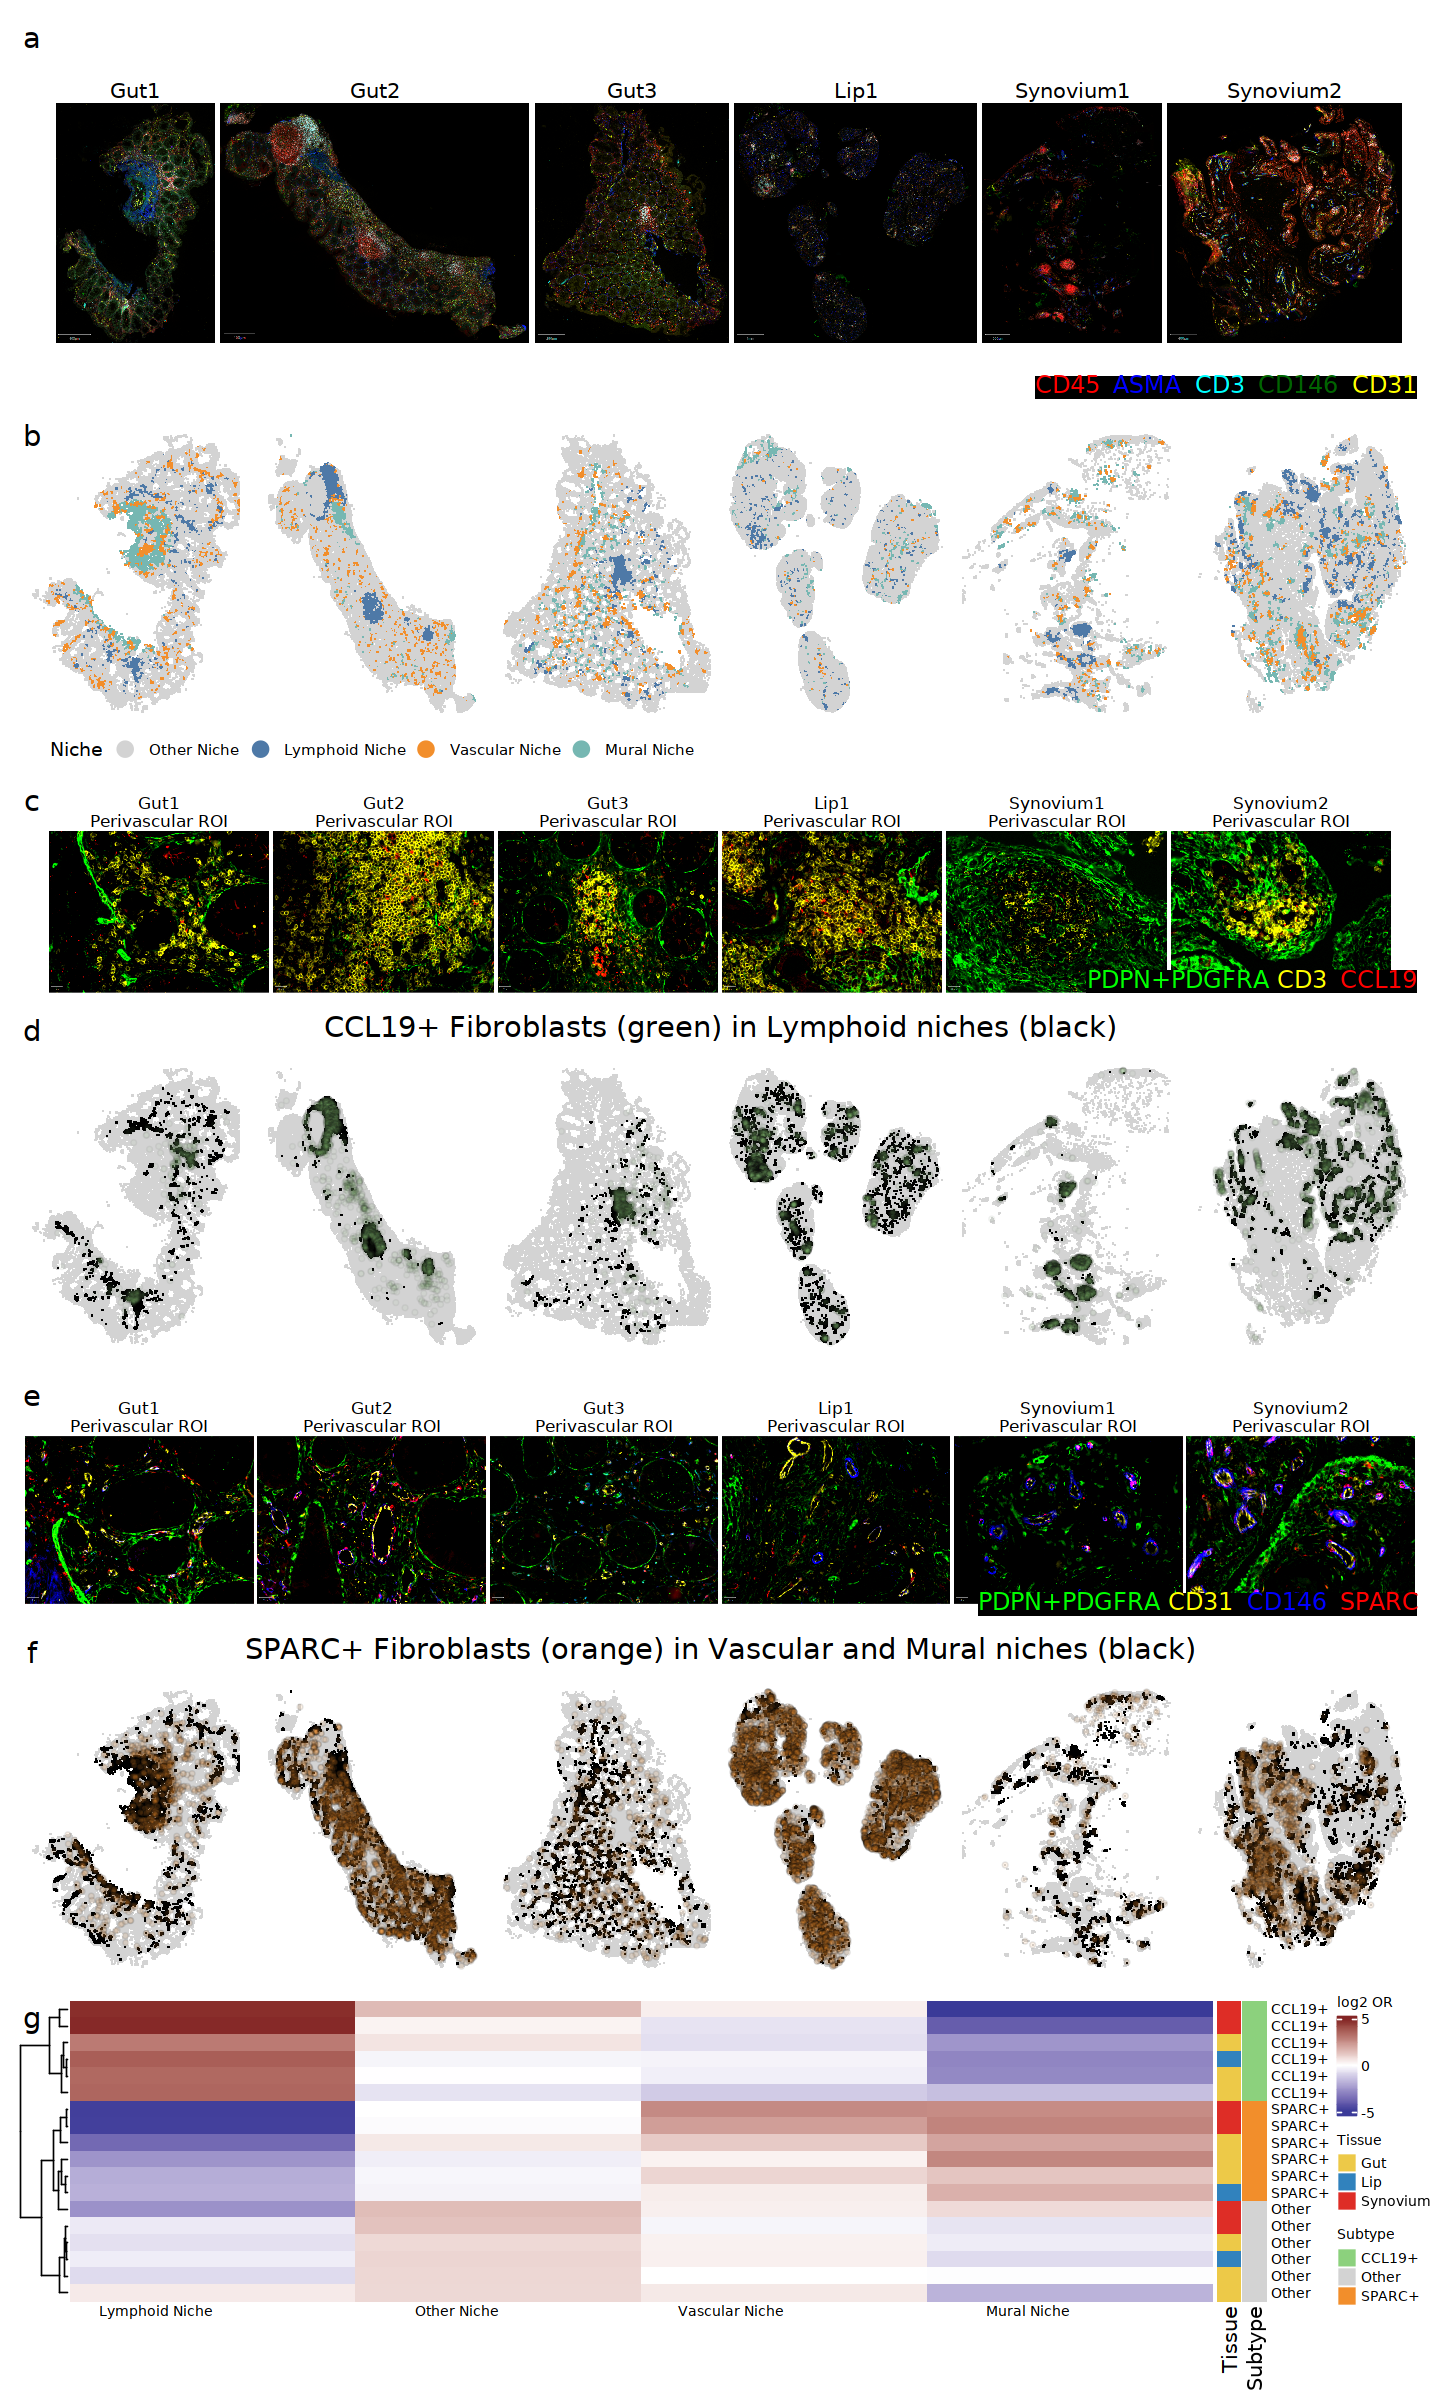

In [184]:
fig.size(20, 12)
fig <- (
    p0 / p1 / p_ro1_lymph / p5 / p_ro1_vasc / p6 / p4
) + 
    plot_layout(heights = c(1, 1, .46, 1, .55, 1, 1.1)) + 
    plot_annotation(tag_levels = 'a')

fig


In [186]:
ggsave(
    filename = '../../manuscript/figures/Figure4.pdf', 
    plot = fig,
    units = 'in', device = 'pdf', 
    height = 20, width = 12,
    useDingbats = FALSE
)

ggsave(
    filename = '../../manuscript/figures/Figure4.png', 
    plot = fig,
    units = 'in', device = 'png', 
    height = 20, width = 12
)

